## Determine if income over $50,000

### Executive Summary

The objective is to predict whether a record's income exceeds USD 50,000 per year based on census data that was extracted by Barry Becker from the 1994 Census database. Using kNN classifier at 80% we are able to predict if the income exceeds the specified threshold or not.

### Data Description 

We have the following features for the census data:

* Age: continuous

* Workclass(Employment): Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked

* Fnlwgt (Final weight): continuous

* Education (Degree): Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool

* Education-num: continuous

* Marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse

* Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces

* Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 

* Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black 

* Sex: Female, Male 

* Capital-gain: continuous

* Capital-loss: continuous

* Hours-per-week: continuous

* Native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Data Processing

We then take a look at the data and place the headers for each column with the data attributes as described above. Data cleaning was no longer necessary for this case.

In [2]:
from sklearn.neighbors import KNeighborsClassifier
import mglearn #library provided by amueller
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
adult = pd.read_csv('adult.data.txt',header=None)

In [4]:
adult.columns = ["Age", "Employment", "Fnlwgt", "Degree", 
                              "Education-num", "Marital-status", "Occupation",
                              "Relationship","Race","Sex","Cap_Gain",
                              "Cap_loss", "Hrs_per_week", "Country", "Income"]

adult.head()

,Age,Employment,Fnlwgt,Degree,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Cap_Gain,Cap_loss,Hrs_per_week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Exploratory Data Analysis

We take the income as the target variable. Using a pairplot, we can visualize the relationship of the features. One plot would be able to capture all the features for this case. But looking at the graph below, there seems to be no significant feature that would be able to predict the income of an individual.

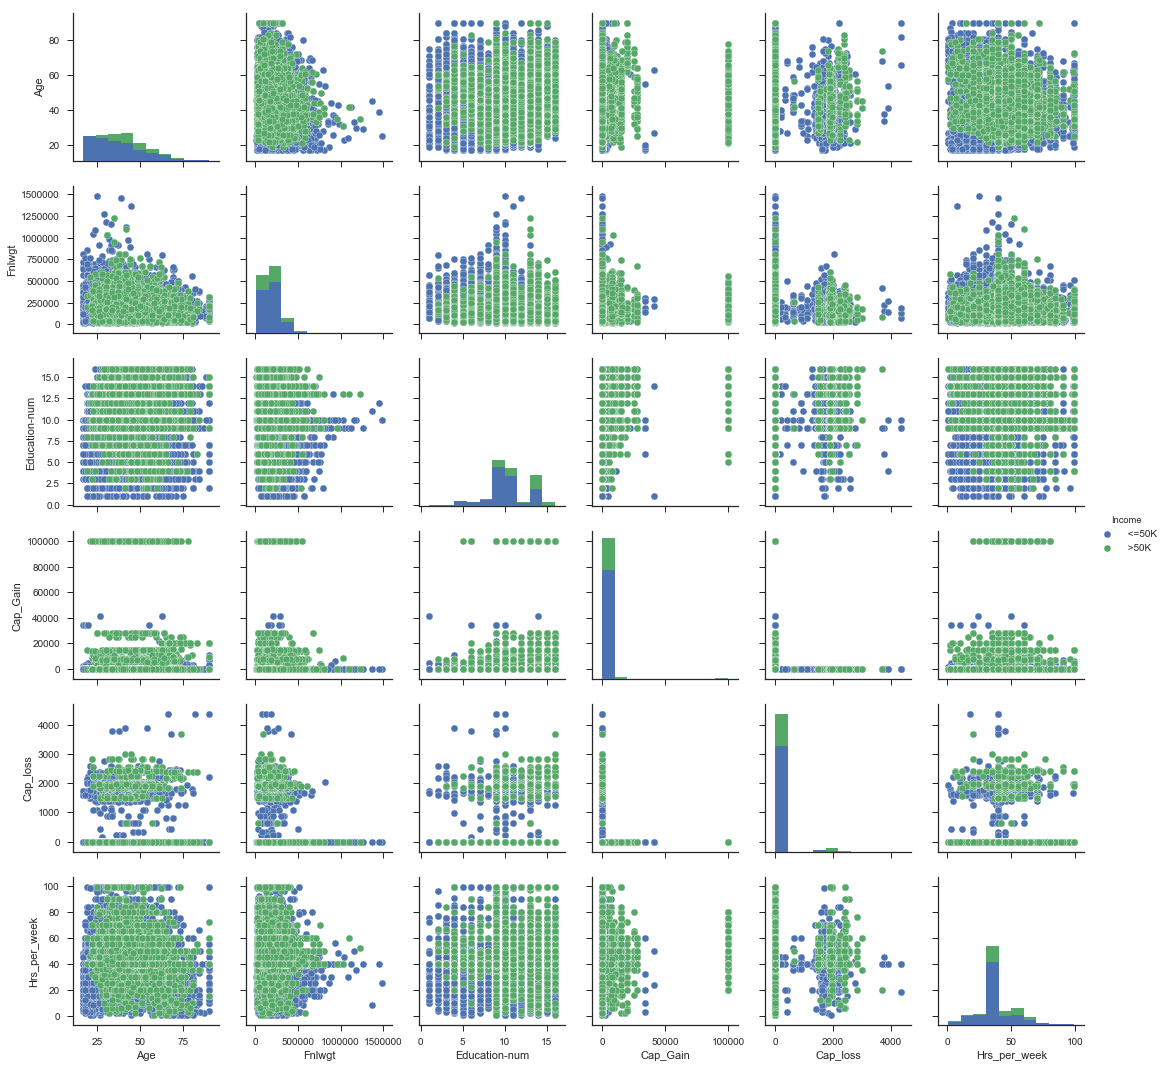

In [6]:
import seaborn as sns
sns.set(style="ticks")

df = pd.DataFrame(adult)
sns.pairplot(df, hue='Income')

pass

### Proportional Chance Criterion

Population per class:             0
 <=50K  24720
 >50K    7841

1.25 * Proportion Chance Criterion: 79.29492137783143%


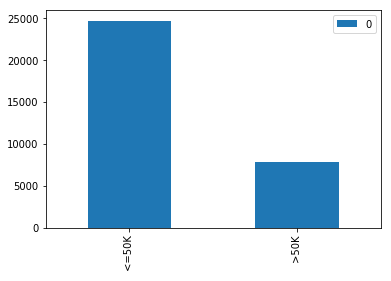

In [22]:
import numpy as np
from collections import Counter
state_counts = Counter(adult.iloc[:,-1])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

num=(df_state[0]/df_state[0].sum())**2
print("Population per class: {}\n".format(df_state))
print("1.25 * Proportion Chance Criterion: {}%".format(1.25*100*num.sum()))

### Model

This leads us to using all the features for the model.

Categorical features were converted using one-hot encoding through the pandas.get_dummies() function. This is to assign numbers to certain categories.

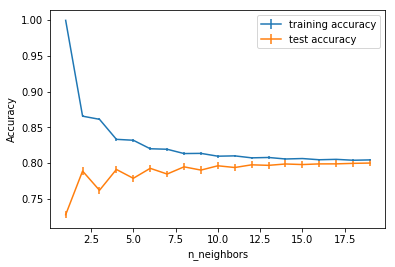

In [25]:
y = df['Income']
X = df.iloc[:,1:-1]

XX = pd.get_dummies(X)

training_accuracy = []
test_accuracy = []
training_std = []
test_std = []
neighbors_settings = range(1, 20)
random_states = range(1,10)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)    
    train_acc_per_trial = []
    test_acc_per_trial = []
    for random_state in random_states:
        # split training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(XX,
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=random_state)
        # build the model
        clf.fit(X_train, y_train)
        # training set accuracy per trial
        train_acc_per_trial.append(clf.score(X_train, y_train))
        # testing set accuracy per trial
        test_acc_per_trial.append(clf.score(X_test, y_test))
    # record ave training accuracy    
    training_accuracy.append(np.mean(train_acc_per_trial))
    # record ave testing accuracy
    test_accuracy.append(np.mean(test_acc_per_trial))
    # record training std
    training_std.append(np.std(train_acc_per_trial))
    # record testing std
    test_std.append(np.std(test_acc_per_trial))
    
    
# plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
# plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.errorbar(neighbors_settings, training_accuracy, yerr=training_std, 
             label="training accuracy" )
plt.errorbar(neighbors_settings, test_accuracy, yerr=test_std, 
             label="test accuracy" )
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Conclusion

At around 8 neighbors, the test accuracy is at 80% which is over the PCC. This means that it is a good predictor whether the person has over $50,000 in income or not. This result came about by choosing to include all the features in the dataset for the prediction.

### References and Acknowledgement

Dua, D. and Karra Taniskidou, E. (2017). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Monterola, C., K-Nearest Neighbor Classification Notebook

Introduction to Machine Learning with Python, A. Mueller and S. Guido, O'Reilly 2017

https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

Thanks to Patricia Manasan and Joseph Bunao for their help in the construction of this notebook.
